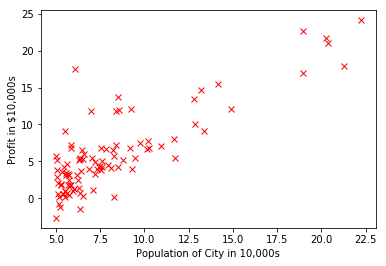

In [55]:
#first thing we're gonna do is import pandas, a strong library for storing our data into tables aka dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb

#store in dataframe
df = pd.read_csv('ex1data1.txt', names=['Population','Profit']) #since .txt file didn't have header names
X_orig = df['Population']
y = df['Profit']
m = len(y)

plt.plot(X_orig, y, 'rx',)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

#done visualizing the data

In [56]:
X = df[['Population']].as_matrix()
X = np.insert(X, 0, 1, axis=1)
X = np.matrix(X)
y = df[['Profit']].as_matrix()

theta = np.matrix(np.zeros((2,1)))
iterations = 1500
alpha = 0.01

#%qtconsole

In [57]:
def computeCost(X, y, theta):
    m = len(y)
    cost = np.sum(np.square(X*theta - y))/(2*m)
    return cost

In [66]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters,1))
    
    for i in range(num_iters):  
        
        error = X*theta - y
        theta = theta - (alpha/m) * (X.T * error)
        J_history[[i]] = computeCost(X,y,theta)
    
    return [theta, J_history]

result = gradientDescent(X,y,theta,alpha,iterations)
theta = result[0]
J_history = result[1]

[matrix([[-3.89570181],
        [ 1.1930257 ]]), array([[ 4.4769715 ],
       [ 4.4769715 ],
       [ 4.4769715 ],
       ..., 
       [ 4.47697138],
       [ 4.47697138],
       [ 4.47697138]])]
[[ 4.47697138]
 [ 4.47697138]
 [ 4.47697138]
 ..., 
 [ 4.47697138]
 [ 4.47697138]
 [ 4.47697138]]


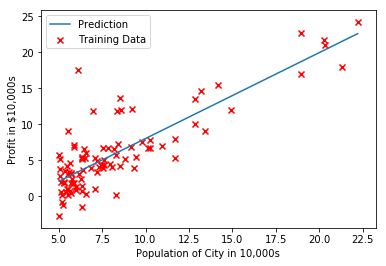

In [67]:
x_line = np.linspace(df.Population.min(), df.Population.max(), 100)
y_line = theta[1,0]*x_line + theta[0,0]
plt.plot(x_line, y_line, label="Prediction")
plt.scatter(X_orig , y, color="r", marker='x',label="Training Data")
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

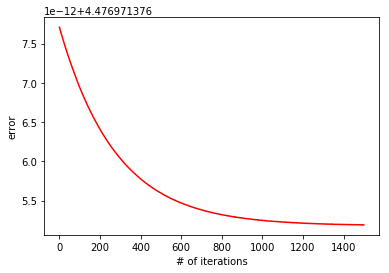

In [70]:
plt.plot(np.arange(iterations), J_history, 'r')
plt.xlabel('# of iterations')
plt.ylabel('error')
plt.show()